## Breast Cancer Diagnostic Classification Models and their performace comparison
- The following notebook contains exploratory data analysis and ML classification models to classify if a cancer is benign or malignant 
- Dataset used: Breast Cancer Wisconsin (Diagnostic) Data Set (https://www.kaggle.com/uciml/breast-cancer-wisconsin-data).
- In this notebook we are going to compare the various ML classification algorithms using metrics like:
 - Classification Accuracy
 - Confusion Matrix
 - Precision and Recall
 - F1 score

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import Markdown as md
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, jaccard_score

In [2]:
train = pd.read_csv("data.csv")
train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
train = train.drop(["Unnamed: 32"], axis=1)
train.shape

(569, 32)

<AxesSubplot:>

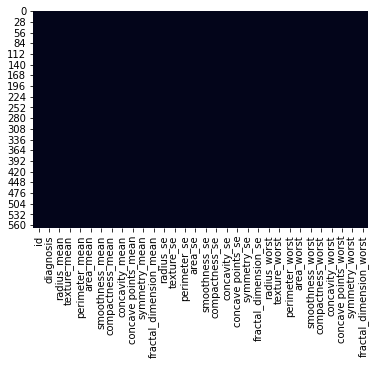

In [4]:
# Heatmap to mark all the missing values in white colour.
sns.heatmap(train.isnull(), cbar=False)

In [5]:
train["diagnosis"].replace({"M":2, "B":1}, inplace=True)

In [6]:
train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,2,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,2,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,2,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,2,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
train_corr = train.corr()

### Heatmap to show the correlation matrix of the features.

[Text(0.5, 0, 'id'),
 Text(1.5, 0, 'diagnosis'),
 Text(2.5, 0, 'radius_mean'),
 Text(3.5, 0, 'texture_mean'),
 Text(4.5, 0, 'perimeter_mean'),
 Text(5.5, 0, 'area_mean'),
 Text(6.5, 0, 'smoothness_mean'),
 Text(7.5, 0, 'compactness_mean'),
 Text(8.5, 0, 'concavity_mean'),
 Text(9.5, 0, 'concave points_mean'),
 Text(10.5, 0, 'symmetry_mean'),
 Text(11.5, 0, 'fractal_dimension_mean'),
 Text(12.5, 0, 'radius_se'),
 Text(13.5, 0, 'texture_se'),
 Text(14.5, 0, 'perimeter_se'),
 Text(15.5, 0, 'area_se'),
 Text(16.5, 0, 'smoothness_se'),
 Text(17.5, 0, 'compactness_se'),
 Text(18.5, 0, 'concavity_se'),
 Text(19.5, 0, 'concave points_se'),
 Text(20.5, 0, 'symmetry_se'),
 Text(21.5, 0, 'fractal_dimension_se'),
 Text(22.5, 0, 'radius_worst'),
 Text(23.5, 0, 'texture_worst'),
 Text(24.5, 0, 'perimeter_worst'),
 Text(25.5, 0, 'area_worst'),
 Text(26.5, 0, 'smoothness_worst'),
 Text(27.5, 0, 'compactness_worst'),
 Text(28.5, 0, 'concavity_worst'),
 Text(29.5, 0, 'concave points_worst'),
 Text(30.5,

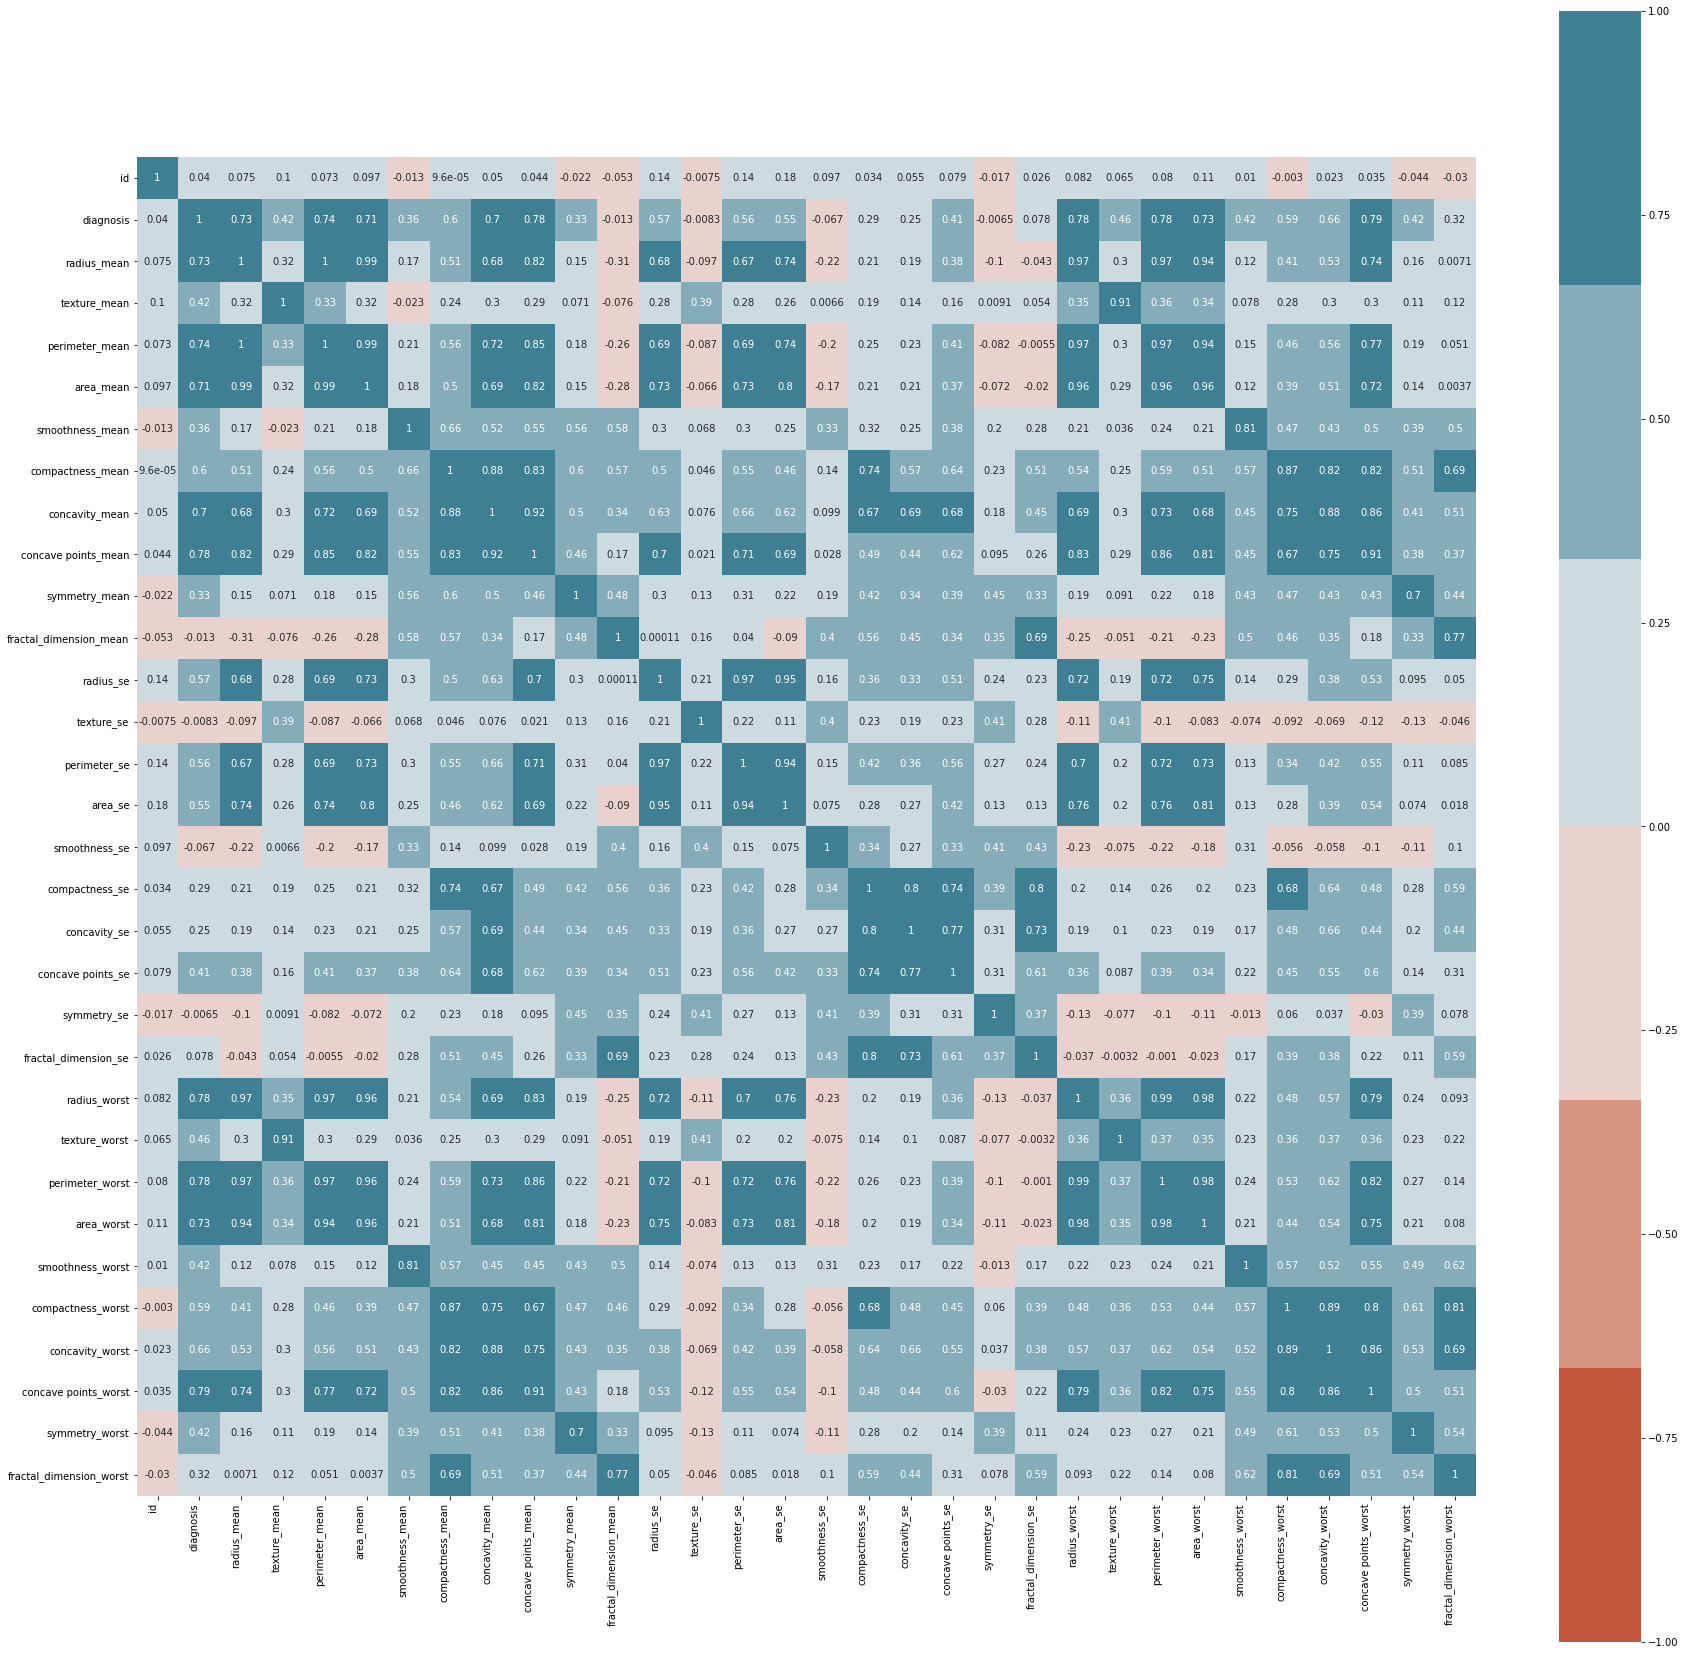

In [8]:
plt.subplots(figsize=(30, 30))
ax = sns.heatmap(
    train_corr,
    vmin = -1.0, vmax = 1.0, center=0,
    cmap = sns.diverging_palette(20, 220),
    annot = True,
    square = True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    horizontalalignment='right'
)

### Selecting features
1) The approach is to choose the features that the correlation of >=0.5 w.r.t. diagnosis

In [9]:
corr_target = abs(train_corr["diagnosis"])
features = corr_target[corr_target>=0.5]
features = features.keys()
features = features.delete(0)
features = features.tolist()
features

['radius_mean',
 'perimeter_mean',
 'area_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst']

In [10]:
X = train[features]
X.head()

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,17.99,122.80,1001.0,0.27760,0.3001,0.14710,1.0950,8.589,153.40,25.38,184.60,2019.0,0.6656,0.7119,0.2654
1,20.57,132.90,1326.0,0.07864,0.0869,0.07017,0.5435,3.398,74.08,24.99,158.80,1956.0,0.1866,0.2416,0.1860
2,19.69,130.00,1203.0,0.15990,0.1974,0.12790,0.7456,4.585,94.03,23.57,152.50,1709.0,0.4245,0.4504,0.2430
3,11.42,77.58,386.1,0.28390,0.2414,0.10520,0.4956,3.445,27.23,14.91,98.87,567.7,0.8663,0.6869,0.2575
4,20.29,135.10,1297.0,0.13280,0.1980,0.10430,0.7572,5.438,94.44,22.54,152.20,1575.0,0.2050,0.4000,0.1625


In [11]:
y = train["diagnosis"]
y.head()

0    2
1    2
2    2
3    2
4    2
Name: diagnosis, dtype: int64

### Splitting the dataset into train and test dataset.
- The dataset is split into Train and Test dataset in 2 ways:
 - First is in a ratio of 80% - 20%.
 - Second is in a ratio of 70% - 20%.

In [12]:
# 80% - 20% Split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=False)

# 70% - 30% Split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.30, random_state=42)

algo = ["XGBoost Classifier", "Random Forest Classifier", "Logistic Regression", "AdaBoost Classifier", "Gradient Boosting", "Bagging Classifier", "CatBoost Classifier"]
accuracy1=[]
precision1 = []
recall1 = []
f1_score1 = []

accuracy2=[]
precision2 = []
recall2 = []
f1_score2 = []

## Creating and training models
These are the following algorithms that are used in this exercise.
1. XGBoost Classifier
2. Random Forest Classifier
3. Logistic Regression 
4. AdaBoost Classifier
5. Gradient Boosting
6. Bagging Classifier
7. CatBoost Classifier

### 1) XGBoost Classifier

In [13]:
# Model 1 with 80% - 20% split
xg_model1 = XGBClassifier()
xg_model1.fit(X_train1, y_train1)
y_pred_xg1 = xg_model1.predict(X_test1)

# Model 2 with 70% - 30% split
xg_model2 = XGBClassifier()
xg_model2.fit(X_train2, y_train2)
y_pred_xg2 = xg_model2.predict(X_test2)

# The statement below is meant to be used for continuous target variable not categorical
# predictions = [round(value) for value in y_pred]

# Calculating Evaluation Metrics for the Model 1
xg_accuracy1 = accuracy_score(y_test1, y_pred_xg1) * 100
xg_confusion1 = confusion_matrix(y_test1, y_pred_xg1)
xg_precision1 = xg_confusion1[0][0]/(xg_confusion1[0][0] + xg_confusion1[1][0]) * 100
xg_recall1 = xg_confusion1[0][0]/(xg_confusion1[0][0] + xg_confusion1[0][1]) * 100
xg_f1_score1 = ((2 * xg_precision1 * xg_recall1) / (xg_precision1 + xg_recall1)) / 100

# Calculating Evaluation Metrics for the Model 2
xg_accuracy2 = accuracy_score(y_test2, y_pred_xg2) * 100
xg_confusion2 = confusion_matrix(y_test2, y_pred_xg2)
xg_precision2 = xg_confusion2[0][0]/(xg_confusion2[0][0] + xg_confusion2[1][0]) * 100
xg_recall2 = xg_confusion2[0][0]/(xg_confusion2[0][0] + xg_confusion2[0][1]) * 100
xg_f1_score2 = ((2 * xg_precision2 * xg_recall2) / (xg_precision2 + xg_recall2)) / 100

# Storing all the metrics in values for Model 1 in common lists
accuracy1.append(round(xg_accuracy1, 2))
precision1.append(round(xg_precision1, 2))
recall1.append(round(xg_recall1, 2))
f1_score1.append(round(xg_f1_score1, 4))

# Storing all the metrics in values for Model 2 in common lists
accuracy2.append(round(xg_accuracy2, 2))
precision2.append(round(xg_precision2, 2))
recall2.append(round(xg_recall2, 2))
f1_score2.append(round(xg_f1_score2, 4))

[09:53:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:53:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/hvjrocks/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hvjrocks/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [14]:
# Evaluation Metrics for the Model 1
print("Results for the 80 - 20 split")
print("Accuracy:", xg_accuracy1)
print("Precision:", xg_precision1)
print("Recall:", xg_recall1)
print("F1 Score:", xg_f1_score1)

print("----------------------------------")
print("----------------------------------")

# Evaluation Metrics for the Model 2
print("Results for the 70 - 30 split")
print("Accuracy:", xg_accuracy2)
print("Precision:", xg_precision2)
print("Recall:", xg_recall2)
print("F1 Score:", xg_f1_score2)


Results for the 80 - 20 split
Accuracy: 98.24561403508771
Precision: 100.0
Recall: 97.72727272727273
F1 Score: 0.9885057471264368
----------------------------------
----------------------------------
Results for the 70 - 30 split
Accuracy: 95.32163742690058
Precision: 96.29629629629629
Recall: 96.29629629629629
F1 Score: 0.9629629629629629


### 2) Random Forest Classifier

In [15]:
# Model 1 with 80% - 20% split
rfc_model1 = RandomForestClassifier()
rfc_model1.fit(X_train1, y_train1)
y_pred_rf1 = rfc_model1.predict(X_test1)

# Model 2 with 70% - 30% split
rfc_model2 = RandomForestClassifier()
rfc_model2.fit(X_train2, y_train2)
y_pred_rf2 = rfc_model2.predict(X_test2)

# Calculating Evaluation Metrics for the Model 1
rf_accuracy1 = accuracy_score(y_test1, y_pred_rf1) * 100
rf_confusion1 = confusion_matrix(y_test1, y_pred_rf1)
rf_precision1 = xg_confusion1[0][0]/(rf_confusion1[0][0] + rf_confusion1[1][0]) * 100
rf_recall1 = xg_confusion1[0][0]/(rf_confusion1[0][0] + rf_confusion1[0][1]) * 100
rf_f1_score1 = ((2 * rf_precision1 * rf_recall1) / (rf_precision1 + rf_recall1)) / 100

# Calculating Evaluation Metrics for the Model 2
rf_accuracy2 = accuracy_score(y_test2, y_pred_rf2) * 100
rf_confusion2 = confusion_matrix(y_test2, y_pred_rf2)
rf_precision2 = xg_confusion2[0][0]/(rf_confusion2[0][0] + rf_confusion2[1][0]) * 100
rf_recall2 = xg_confusion2[0][0]/(rf_confusion2[0][0] + rf_confusion2[0][1]) * 100
rf_f1_score2 = ((2 * rf_precision2 * rf_recall2) / (rf_precision2 + rf_recall2)) / 100

# Storing all the metrics in values for Model 1 in common lists
accuracy1.append(round(rf_accuracy1, 2))
precision1.append(round(rf_precision1, 2))
recall1.append(round(rf_recall1, 2))
f1_score1.append(round(rf_f1_score1, 4))

# Storing all the metrics in values for Model 2 in common lists
accuracy2.append(round(rf_accuracy2, 2))
precision2.append(round(rf_precision2, 2))
recall2.append(round(rf_recall2, 2))
f1_score2.append(round(rf_f1_score2, 4))

In [16]:
# Evaluation Metrics for the Model 1
print("Results for the 80% - 20% split")
print("Accuracy:", rf_accuracy1)
print("Precision:", rf_precision1)
print("Recall:", rf_recall1)
print("F1 Score:", rf_f1_score1)

print("----------------------------------")
print("----------------------------------")

# Evaluation Metrics for the Model 2
print("Results for the 70% - 30% split")
print("Accuracy:", rf_accuracy2)
print("Precision:", rf_precision2)
print("Recall:", rf_recall2)
print("F1 Score:", rf_f1_score2)

Results for the 80% - 20% split
Accuracy: 97.36842105263158
Precision: 98.85057471264368
Recall: 97.72727272727273
F1 Score: 0.9828571428571428
----------------------------------
----------------------------------
Results for the 70% - 30% split
Accuracy: 96.49122807017544
Precision: 94.54545454545455
Recall: 96.29629629629629
F1 Score: 0.9541284403669725


### 3) Logistic Regression

In [17]:
# Model 1 with 80% - 20% split
lr_model1 = LogisticRegression(class_weight='dict', max_iter=500, random_state=42)
lr_model1.fit(X_train1, y_train1)
y_pred_lr1 = lr_model1.predict(X_test1)

# Model 2 with 70% - 30% split
lr_model2 = LogisticRegression(class_weight='dict', max_iter=300, random_state=42)
lr_model2.fit(X_train2, y_train2)
y_pred_lr2 = lr_model2.predict(X_test2)

# Calculating Evaluation Metrics for the Model 1
lr_accuracy1 = accuracy_score(y_test1, y_pred_lr1) * 100
lr_confusion1 = confusion_matrix(y_test1, y_pred_lr1)
lr_precision1 = lr_confusion1[0][0]/(lr_confusion1[0][0] + lr_confusion1[1][0]) * 100
lr_recall1 = lr_confusion1[0][0]/(lr_confusion1[0][0] + lr_confusion1[0][1]) * 100
lr_f1_score1 = ((2 * lr_precision1 * lr_recall1) / (lr_precision1 + lr_recall1)) / 100

# Calculating Evaluation Metrics for the Model 2
lr_accuracy2 = accuracy_score(y_test2, y_pred_lr2) * 100
lr_confusion2 = confusion_matrix(y_test2, y_pred_lr2)
lr_precision2 = lr_confusion2[0][0]/(lr_confusion2[0][0] + lr_confusion2[1][0]) * 100
lr_recall2 = lr_confusion2[0][0]/(lr_confusion2[0][0] + lr_confusion2[0][1]) * 100
lr_f1_score2 = ((2 * lr_precision2 * lr_recall2) / (lr_precision2 + lr_recall2)) / 100

# Storing all the metrics in values for Model 1 in common lists
accuracy1.append(round(lr_accuracy1, 2))
precision1.append(round(lr_precision1, 2))
recall1.append(round(lr_recall1, 2))
f1_score1.append(round(lr_f1_score1, 4))

# Storing all the metrics in values for Model 2 in common lists
accuracy2.append(round(lr_accuracy2, 2))
precision2.append(round(lr_precision2, 2))
recall2.append(round(lr_recall2, 2))
f1_score2.append(round(lr_f1_score2, 4))

/Users/hvjrocks/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
# Evaluation Metrics for the Model 1
print("Results for the 80% - 20% split")
print("Accuracy:", lr_accuracy1)
print("Precision:", lr_precision1)
print("Recall:", lr_recall1)
print("F1 Score:", lr_f1_score1)

print("----------------------------------")
print("----------------------------------")

# Evaluation Metrics for the Model 2
print("Results for the 70% - 30% split")
print("Accuracy:", lr_accuracy2)
print("Precision:", lr_precision2)
print("Recall:", lr_recall2)
print("F1 Score:", lr_f1_score2)

Results for the 80% - 20% split
Accuracy: 93.85964912280701
Precision: 98.79518072289156
Recall: 93.18181818181817
F1 Score: 0.9590643274853801
----------------------------------
----------------------------------
Results for the 70% - 30% split
Accuracy: 98.83040935672514
Precision: 99.07407407407408
Recall: 99.07407407407408
F1 Score: 0.9907407407407409


### 4) AdaBoost Classifier

In [19]:
# Model 1 with 80% - 20% split
ab_model1 = AdaBoostClassifier(n_estimators=500, learning_rate=0.1, random_state=42)
ab_model1.fit(X_train1, y_train1)
y_pred_ab1 = ab_model1.predict(X_test1)

# Model 2 with 70% - 30% split
ab_model2 = AdaBoostClassifier(n_estimators=500, learning_rate=0.1, random_state=42)
ab_model2.fit(X_train2, y_train2)
y_pred_ab2 = ab_model2.predict(X_test2)

# Calculating Evaluation Metrics for the Model 1
ab_accuracy1 = accuracy_score(y_test1, y_pred_ab1) * 100
ab_confusion1 = confusion_matrix(y_test1, y_pred_ab1)
ab_precision1 = ab_confusion1[0][0]/(ab_confusion1[0][0] + ab_confusion1[1][0]) * 100
ab_recall1 = ab_confusion1[0][0]/(ab_confusion1[0][0] + ab_confusion1[0][1]) * 100
ab_f1_score1 = ((2 * ab_precision1 * ab_recall1) / (ab_precision1 + ab_recall1)) / 100

# Calculating Evaluation Metrics for the Model 2
ab_accuracy2 = accuracy_score(y_test2, y_pred_ab2) * 100
ab_confusion2 = confusion_matrix(y_test2, y_pred_ab2)
ab_precision2 = ab_confusion2[0][0]/(ab_confusion2[0][0] + ab_confusion2[1][0]) * 100
ab_recall2 = ab_confusion2[0][0]/(ab_confusion2[0][0] + ab_confusion2[0][1]) * 100
ab_f1_score2 = ((2 * ab_precision2 * ab_recall2) / (ab_precision2 + ab_recall2)) / 100

# Storing all the metrics in values for Model 1 in common lists
accuracy1.append(round(ab_accuracy1, 2))
precision1.append(round(ab_precision1, 2))
recall1.append(round(ab_recall1, 2))
f1_score1.append(round(ab_f1_score1, 4))

# Storing all the metrics in values for Model 2 in common lists
accuracy2.append(round(ab_accuracy2, 2))
precision2.append(round(ab_precision2, 2))
recall2.append(round(ab_recall2, 2))
f1_score2.append(round(ab_f1_score2, 4))

In [20]:
# Evaluation Metrics for the Model 1
print("Results for the 80% - 20% split")
print("Accuracy:", ab_accuracy1)
print("Precision:", ab_precision1)
print("Recall:", ab_recall1)
print("F1 Score:", ab_f1_score1)

print("----------------------------------")
print("----------------------------------")

# Evaluation Metrics for the Model 2
print("Results for the 70% - 30% split")
print("Accuracy:", ab_accuracy2)
print("Precision:", ab_precision2)
print("Recall:", ab_recall2)
print("F1 Score:", ab_f1_score2)

Results for the 80% - 20% split
Accuracy: 97.36842105263158
Precision: 98.85057471264368
Recall: 97.72727272727273
F1 Score: 0.9828571428571428
----------------------------------
----------------------------------
Results for the 70% - 30% split
Accuracy: 94.73684210526315
Precision: 96.26168224299066
Recall: 95.37037037037037
F1 Score: 0.958139534883721


### 5) Gradient Boosting Classifier

In [21]:
# Model 1 with 80% - 20% split
gb_model1 = GradientBoostingClassifier()
gb_model1.fit(X_train1, y_train1)
y_pred_gb1 = gb_model1.predict(X_test1)

# Model 2 with 70% - 30% split
gb_model2 = GradientBoostingClassifier()
gb_model2.fit(X_train2, y_train2)
y_pred_gb2 = gb_model2.predict(X_test2)

# Calculating Evaluation Metrics for the Model 1
gb_accuracy1 = accuracy_score(y_test1, y_pred_gb1) * 100
gb_confusion1 = confusion_matrix(y_test1, y_pred_gb1)
gb_precision1 = gb_confusion1[0][0]/(gb_confusion1[0][0] + gb_confusion1[1][0]) * 100
gb_recall1 = gb_confusion1[0][0]/(gb_confusion1[0][0] + gb_confusion1[0][1]) * 100
gb_f1_score1 = ((2 * gb_precision1 * gb_recall1) / (gb_precision1 + gb_recall1)) / 100

# Calculating Evaluation Metrics for the Model 2
gb_accuracy2 = accuracy_score(y_test2, y_pred_gb2) * 100
gb_confusion2 = confusion_matrix(y_test2, y_pred_gb2)
gb_precision2 = gb_confusion2[0][0]/(gb_confusion2[0][0] + gb_confusion2[1][0]) * 100
gb_recall2 = gb_confusion2[0][0]/(gb_confusion2[0][0] + gb_confusion2[0][1]) * 100
gb_f1_score2 = ((2 * gb_precision2 * gb_recall2) / (gb_precision2 + gb_recall2)) / 100

# Storing all the metrics in values for Model 1 in common lists
accuracy1.append(round(gb_accuracy1, 2))
precision1.append(round(gb_precision1, 2))
recall1.append(round(gb_recall1, 2))
f1_score1.append(round(gb_f1_score1, 4))

# Storing all the metrics in values for Model 2 in common lists
accuracy2.append(round(gb_accuracy2, 2))
precision2.append(round(gb_precision2, 2))
recall2.append(round(gb_recall2, 2))
f1_score2.append(round(gb_f1_score2, 4))

In [22]:
# Evaluation Metrics for the Model 1
print("Results for the 80% - 20% split")
print("Accuracy:", gb_accuracy1)
print("Precision:", gb_precision1)
print("Recall:", gb_recall1)
print("F1 Score:", gb_f1_score1)

print("----------------------------------")
print("----------------------------------")

# Evaluation Metrics for the Model 2
print("Results for the 70% - 30% split")
print("Accuracy:", gb_accuracy2)
print("Precision:", gb_precision2)
print("Recall:", gb_recall2)
print("F1 Score:", gb_f1_score2)

Results for the 80% - 20% split
Accuracy: 98.24561403508771
Precision: 100.0
Recall: 97.72727272727273
F1 Score: 0.9885057471264368
----------------------------------
----------------------------------
Results for the 70% - 30% split
Accuracy: 94.73684210526315
Precision: 96.26168224299066
Recall: 95.37037037037037
F1 Score: 0.958139534883721


### 6) Bagging Classifier

In [23]:
# Model 1 with 80% - 20% split
bc_model1 = BaggingClassifier(n_estimators=200, random_state=42)
bc_model1.fit(X_train1, y_train1)
y_pred_bc1 = bc_model1.predict(X_test1)

# Model 2 with 70% - 30% split
bc_model2 = BaggingClassifier(n_estimators=200, random_state=42)
bc_model2.fit(X_train2, y_train2)
y_pred_bc2 = bc_model2.predict(X_test2)


# Calculating Evaluation Metrics for the Model 1
bc_accuracy1 = accuracy_score(y_test1, y_pred_bc1) * 100
bc_confusion1 = confusion_matrix(y_test1, y_pred_bc1)
bc_precision1 = bc_confusion1[0][0]/(bc_confusion1[0][0] + bc_confusion1[1][0]) * 100
bc_recall1 = bc_confusion1[0][0]/(bc_confusion1[0][0] + bc_confusion1[0][1]) * 100
bc_f1_score1 = ((2 * bc_precision1 * bc_recall1) / (bc_precision1 + bc_recall1)) / 100

# Calculating Evaluation Metrics for the Model 2
bc_accuracy2 = accuracy_score(y_test2, y_pred_bc2) * 100
bc_confusion2 = confusion_matrix(y_test2, y_pred_bc2)
bc_precision2 = bc_confusion2[0][0]/(bc_confusion2[0][0] + bc_confusion2[1][0]) * 100
bc_recall2 = bc_confusion2[0][0]/(bc_confusion2[0][0] + bc_confusion2[0][1]) * 100
bc_f1_score2 = ((2 * bc_precision2 * bc_recall2) / (bc_precision2 + bc_recall2)) / 100

# Storing all the metrics in values for Model 1 in common lists
accuracy1.append(round(bc_accuracy1, 2))
precision1.append(round(bc_precision1, 2))
recall1.append(round(bc_recall1, 2))
f1_score1.append(round(bc_f1_score1, 4))

# Storing all the metrics in values for Model 2 in common lists
accuracy2.append(round(bc_accuracy2, 2))
precision2.append(round(bc_precision2, 2))
recall2.append(round(bc_recall2, 2))
f1_score2.append(round(bc_f1_score2, 4))

In [24]:
# Evaluation Metrics for the Model 1
print("Results for the 80% - 20% split")
print("Accuracy:", bc_accuracy1)
print("Precision:", bc_precision1)
print("Recall:", bc_recall1)
print("F1 Score:", bc_f1_score1)

print("----------------------------------")
print("----------------------------------")

# Evaluation Metrics for the Model 2
print("Results for the 70% - 30% split")
print("Accuracy:", bc_accuracy2)
print("Precision:", bc_precision2)
print("Recall:", bc_recall2)
print("F1 Score:", bc_f1_score2)

Results for the 80% - 20% split
Accuracy: 97.36842105263158
Precision: 98.85057471264368
Recall: 97.72727272727273
F1 Score: 0.9828571428571428
----------------------------------
----------------------------------
Results for the 70% - 30% split
Accuracy: 94.73684210526315
Precision: 96.26168224299066
Recall: 95.37037037037037
F1 Score: 0.958139534883721


### 7) CatBoost Classifier

In [25]:
# Model 1 with 80% - 20% split
cb_model1 = CatBoostClassifier(iterations=200, logging_level='Silent')
cb_model1.fit(X_train1, y_train1)
y_pred_cb1 = cb_model1.predict(X_test1)

# Model 2 with 70% - 30% split
cb_model2 = CatBoostClassifier(iterations=200, logging_level='Silent')
cb_model2.fit(X_train2, y_train2)
y_pred_cb2 = cb_model2.predict(X_test2)

# Calculating Evaluation Metrics for the Model 1
cb_accuracy1 = accuracy_score(y_test1, y_pred_cb1) * 100
cb_confusion1 = confusion_matrix(y_test1, y_pred_cb1)
cb_precision1 = cb_confusion1[0][0]/(cb_confusion1[0][0] + cb_confusion1[1][0]) * 100
cb_recall1 = cb_confusion1[0][0]/(cb_confusion1[0][0] + cb_confusion1[0][1]) * 100
cb_f1_score1 = ((2 * cb_precision1 * cb_recall1) / (cb_precision1 + cb_recall1)) / 100

# Calculating Evaluation Metrics for the Model 2
cb_accuracy2 = accuracy_score(y_test2, y_pred_cb2) * 100
cb_confusion2 = confusion_matrix(y_test2, y_pred_cb2)
cb_precision2 = cb_confusion2[0][0]/(cb_confusion2[0][0] + cb_confusion2[1][0]) * 100
cb_recall2 = cb_confusion2[0][0]/(cb_confusion2[0][0] + cb_confusion2[0][1]) * 100
cb_f1_score2 = ((2 * cb_precision2 * cb_recall2) / (cb_precision2 + cb_recall2)) / 100

# Storing all the metrics in values for Model 1 in common lists
accuracy1.append(round(cb_accuracy1, 2))
precision1.append(round(cb_precision1, 2))
recall1.append(round(cb_recall1, 2))
f1_score1.append(round(cb_f1_score1, 4))

# Storing all the metrics in values for Model 2 in common lists
accuracy2.append(round(cb_accuracy2, 2))
precision2.append(round(cb_precision2, 2))
recall2.append(round(cb_recall2, 2))
f1_score2.append(round(cb_f1_score2, 4))

# To see the hyper-parameters for this model use "cb_model.get_all_params()"

In [26]:
# Evaluation Metrics for the Model 1
print("Results for the 80% - 20% split")
print("Accuracy Score:", cb_accuracy1)
print("Precision:", cb_precision1)
print("Recall:", cb_recall1)
print("F1 Score:", cb_f1_score1)

print("----------------------------------")
print("----------------------------------")

# Evaluation Metrics for the Model 2
print("Results for the 70% - 30% split")
print("Accuracy Score:", cb_accuracy2)
print("Precision:", cb_precision2)
print("Recall:", cb_recall2)
print("F1 Score:", cb_f1_score2)

Results for the 80% - 20% split
Accuracy Score: 97.36842105263158
Precision: 98.85057471264368
Recall: 97.72727272727273
F1 Score: 0.9828571428571428
----------------------------------
----------------------------------
Results for the 70% - 30% split
Accuracy Score: 95.32163742690058
Precision: 94.64285714285714
Recall: 98.14814814814815
F1 Score: 0.9636363636363636


### Tabular Performance Comparison of all the algorithm w.r.t. the train-test data split

In [27]:
metric1 = pd.DataFrame({
    'Alogrithms':algo,
    'Accuracy':accuracy1,
    'Precision':precision1,
    'Recall':recall1,
    'F1 Score':f1_score1
})

metric2 = pd.DataFrame({
    'Alogrithms':algo,
    'Accuracy':accuracy2,
    'Precision':precision2,
    'Recall':recall2,
    'F1 Score':f1_score2
})

#### Metrics in the 80% - 20% setting

In [28]:
metric1

,Alogrithms,Accuracy,Precision,Recall,F1 Score
0,XGBoost Classifier,98.25,100.00,97.73,0.9885
1,Random Forest Classifier,97.37,98.85,97.73,0.9829
2,Logistic Regression,93.86,98.80,93.18,0.9591
3,AdaBoost Classifier,97.37,98.85,97.73,0.9829
4,Gradient Boosting,98.25,100.00,97.73,0.9885
5,Bagging Classifier,97.37,98.85,97.73,0.9829
6,CatBoost Classifier,97.37,98.85,97.73,0.9829


#### Metrics in the 70% - 30% setting

In [29]:
metric2

,Alogrithms,Accuracy,Precision,Recall,F1 Score
0,XGBoost Classifier,95.32,96.30,96.30,0.9630
1,Random Forest Classifier,96.49,94.55,96.30,0.9541
2,Logistic Regression,98.83,99.07,99.07,0.9907
3,AdaBoost Classifier,94.74,96.26,95.37,0.9581
4,Gradient Boosting,94.74,96.26,95.37,0.9581
5,Bagging Classifier,94.74,96.26,95.37,0.9581
6,CatBoost Classifier,95.32,94.64,98.15,0.9636


### Conclusion
<p>In my opinion I think that choosing the 80-20 setting is always a better in small or medium sized datasets. But I have observed that in 70-30 setting Logistic Regression has outperformed all the algorithms irrespective of the settings by a very narrow margin.</p>
Overall it would be a good idea to choose XGBoost Classifier in 80-20 setting.